<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Fine_tuning_BERT_for_Amharic_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset from my drive using the above drive
dataframe =pd.read_excel('/content/drive/MyDrive/hate/Book1.xlsx')


In [4]:
dataframe.label.unique()

array([2, 1, 0])

In [5]:
print(dataframe)

       label                                               post
0          2                            እስክሪብቶ በመብላት እውቀት አይገኝም
1          2                                            ቦቅባቃ ሁሉ
2          1   ለኢትዮጵያውያን ምንም ለውጥ አልመጣም ያው የዝር ፖለቲካ የዘር ልዩነቱ ...
3          0  ሁሉም የሃገሪቷ ህዝቦች መጥፎ ቃላትን ከአንደበታቸው ቂም በቀልን ከልባቸው...
4          0    የአባቶቻችን አምላክ እግዚአብሔር ሆይ በየጊዜው በጽንፈኞችና የመገንጠል...
...      ...                                                ...
14980      1       ስርዓቱ እያለ ጃዋር በጎረቤት ሀገር የአየር ክልል ማለፍ ይፈራ ነበር 
14981      1                       በቃ አመቱ በመተቃቀፍ አለቀች ወይ ይች ሐገር
14982      2                                    ሸፈታ አይሳካልህም ደደብ
14983      1  ጀነራል አሳምነውን ከክልሉ ፀጥታ ለማባረር ሴራ የሚጠነስሱ ከህወሀት ጋር ...
14984      2                              አማራ ኢትዮጵያ ማለቱ አስጠቅቶታል

[14985 rows x 2 columns]


In [6]:
# changing category to numeric
label=pd.Categorical(dataframe['label']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

       label                                               post  labels
0          2                            እስክሪብቶ በመብላት እውቀት አይገኝም       2
1          2                                            ቦቅባቃ ሁሉ       2
2          1   ለኢትዮጵያውያን ምንም ለውጥ አልመጣም ያው የዝር ፖለቲካ የዘር ልዩነቱ ...       1
3          0  ሁሉም የሃገሪቷ ህዝቦች መጥፎ ቃላትን ከአንደበታቸው ቂም በቀልን ከልባቸው...       0
4          0    የአባቶቻችን አምላክ እግዚአብሔር ሆይ በየጊዜው በጽንፈኞችና የመገንጠል...       0
...      ...                                                ...     ...
14980      1       ስርዓቱ እያለ ጃዋር በጎረቤት ሀገር የአየር ክልል ማለፍ ይፈራ ነበር        1
14981      1                       በቃ አመቱ በመተቃቀፍ አለቀች ወይ ይች ሐገር       1
14982      2                                    ሸፈታ አይሳካልህም ደደብ       2
14983      1  ጀነራል አሳምነውን ከክልሉ ፀጥታ ለማባረር ሴራ የሚጠነስሱ ከህወሀት ጋር ...       1
14984      2                              አማራ ኢትዮጵያ ማለቱ አስጠቅቶታል       2

[14985 rows x 3 columns]


In [7]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [8]:
dataframe['word_len'] = dataframe['post'].str.split().str.len()
print(dataframe['word_len'].mean())

8.809275942609275


In [ ]:
#number of news under each categories
#accident=dataframe[dataframe['category']=='accident']
#agir=dataframe[dataframe['category']=='agriculture']
#health=dataframe[dataframe['category']=='health']
#education=dataframe[dataframe['category']=='education']
#economy=dataframe[dataframe['category']=='economy']
#politics=dataframe[dataframe['category']=='politics']
#sport=dataframe[dataframe['category']=='sport']
#print(accident.shape)
#print(agir.shape)
#print(health.shape)
#print(education.shape)
#print(economy.shape)
#print(politics.shape)
#print(sport.shape)

In [9]:
#normalizarion
import re
# normalizatio table
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48

In [12]:
# apply normalization and special characters removal
dataframe['post']=dataframe['post'].apply(lambda x: normalization(x))

In [13]:
# special symbol removal
dataframe['post']=dataframe['post'].str.replace('[^\w\s]','',regex=True)

In [14]:
# removing digits from the dataset
dataframe['post']=dataframe['post'].str.replace('\d+','',regex=True)

In [15]:
print(dataframe)

       label                                               post  labels  \
8169       1  ቄሮ አሁንስ አበዛው ወሎ ገብቶ ኦነጉን ብሩክ እንዲህ መደብደብ ምን ይሉታ...       1   
14300      0                        እረ የምን ሰደብስ አይደለም ሙያ በልብ ነው       0   
13567      1                            እባክህ ውጣልን በስማችን አትነግድብን       1   
13878      0             ወያኔ መሆን ባያኮራም ነፃ ምርጫህን ካለማመንትት እናከብራለን       0   
852        0                 ምነው ሁሉም ብሄረሰብ እንደ ጉራጌ ቢሆን ምርጦች ናቸው       0   
...      ...                                                ...     ...   
1563       2  አዲስ አበባ የኢትዮጵያ ህዝብ ናት የኛ እና ኬኛ የምትሉ ከሆነ የጋራነትን...       2   
1837       0                    ኧረ አታስቁኝ ኬሚሴ ነው ያላችሁ የት ሄጀ ልፈንዳ       0   
4195       1                                የአማራ የህዝብ መነሳት አለበት       1   
8360       2                    እናግዛለን አካዉንት ግን ከንግድ ባንክ ዉጭ ይሁን       2   
640        2                    ፉና የሚባል ሚዲያ የእነ ብልግና ተላላኪ ና ጆከኛ       2   

       word_len                                           articles  
8169         13  ቄሮ አሁንስ አበዛው 

In [16]:
# train test split
from sklearn.model_selection import train_test_split
train_val_df, test_dataset = train_test_split(dataframe, test_size=0.20, random_state=42)
train_dataset, evaluation_dataset = train_test_split(train_val_df, test_size=0.10, random_state=42)
print('Training dataset shape: ', train_dataset.shape)
print('Validation dataset shape: ', evaluation_dataset.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (10789, 5)
Validation dataset shape:  (1199, 5)
Testing dataset shape:  (2997, 5)


In [17]:
print(dataframe.head(10))

       label                                               post  labels  \
8169       1  ቄሮ አሁንስ አበዛው ወሎ ገብቶ ኦነጉን ብሩክ እንዲህ መደብደብ ምን ይሉታ...       1   
14300      0                        እረ የምን ሰደብስ አይደለም ሙያ በልብ ነው       0   
13567      1                            እባክህ ውጣልን በስማችን አትነግድብን       1   
13878      0             ወያኔ መሆን ባያኮራም ነፃ ምርጫህን ካለማመንትት እናከብራለን       0   
852        0                 ምነው ሁሉም ብሄረሰብ እንደ ጉራጌ ቢሆን ምርጦች ናቸው       0   
4283       2  ፍትህ የፍትህ ያለሽ ገና ለጋው በስቃይ ህይወቱን እያሳለፈ ነው ሰርቆና ቀ...       2   
14822      2  ጥቂት ወራት በፊት የአብን አመራሮች ፉከራ የተወሰዱብንን ታሪካዊ ርስቶች ...       2   
14567      0   ለማወቅ ትእግስትና ፍቅር ያስፈልገናል እላለሁ መልካም አዳር እንዲሁም አ...       0   
1823       1  ጠቅላይ ሚንስትሩ አብይ እባከዎትን በመጀመሪያ ኦዲፓን ያፅዱ ነው ወይስ አ...       1   
13518      0                            ሱስ ደባል ነው ብሎሀል አንድ ወንድሜ       0   

       word_len                                           articles  
8169         13  ቄሮ አሁንስ አበዛው ወሎ ገብቶ ኦነጉን ብሩክ እንዲህ መደብደብ ምን ይሉታ...  
14300         7                     

In [18]:
msk = np.random.rand(len(dataframe)) < 0.8
train_dataset = dataframe[msk]
test_dataset = dataframe[~msk]

In [19]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [20]:
from datasets import Dataset

In [21]:
#convert format of the dataset to HuggingFace Dataset from Pandas DataFrame
test_dataset=Dataset.from_pandas(test_dataset)


In [22]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
train_dataset=Dataset.from_pandas(train_dataset)

In [23]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
evaluation_dataset=Dataset.from_pandas(evaluation_dataset)

In [24]:
#preview of the dataset after conversion
(test_dataset)

Dataset({
    features: ['label', 'post', 'labels', 'word_len', 'articles', '__index_level_0__'],
    num_rows: 2977
})

In [25]:
print(test_dataset['labels'])

[0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 

In [26]:
(train_dataset)

Dataset({
    features: ['label', 'post', 'labels', 'word_len', 'articles', '__index_level_0__'],
    num_rows: 12008
})

In [27]:
(evaluation_dataset)

Dataset({
    features: ['label', 'post', 'labels', 'word_len', 'articles', '__index_level_0__'],
    num_rows: 1199
})

In [28]:
#remove unnecessary column
test_dataset=test_dataset.remove_columns("__index_level_0__")
train_dataset=train_dataset.remove_columns("__index_level_0__")
evaluation_dataset=evaluation_dataset.remove_columns("__index_level_0__")

In [29]:
#combine the train and test dataset into one datset
import datasets
main_dataset= datasets.DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'evaluate': evaluation_dataset
})

In [30]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'post', 'labels', 'word_len', 'articles'],
        num_rows: 12008
    })
    test: Dataset({
        features: ['label', 'post', 'labels', 'word_len', 'articles'],
        num_rows: 2977
    })
    evaluate: Dataset({
        features: ['label', 'post', 'labels', 'word_len', 'articles'],
        num_rows: 1199
    })
})

In [31]:
# training and testing data size
training_data_size = main_dataset['train'].num_rows
testing_data_size = main_dataset['test'].num_rows
evaluation_data_size = main_dataset['evaluate'].num_rows

In [32]:
from transformers import AutoTokenizer

In [33]:
#loading a tokenizer from the pretrained model
tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/798 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [34]:
#Have a tokenizer function that uses the tokenizer
def tokenize_function(data):
    return tokenizer(data["articles"], padding="max_length", truncation=True)

In [35]:
#Tokenize all the data using the mapping functionality
tokenized_datasets = main_dataset.map(tokenize_function)

Map:   0%|          | 0/12008 [00:00<?, ? examples/s]

Map:   0%|          | 0/2977 [00:00<?, ? examples/s]

Map:   0%|          | 0/1199 [00:00<?, ? examples/s]

In [36]:
#remove the posts column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["articles"])

In [37]:
#import torch
import torch
#import Data loader from torch
from torch.utils.data import DataLoader
#import an optimizer
from torch.optim import AdamW
#import tqdm for a progress bar
from tqdm.auto import tqdm

In [38]:
#changing the format of the tokenized dataset to torch
tokenized_datasets.set_format("torch")

In [39]:
#shuffeling and selecting the needed size of dataset for training and evaluating the model
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(training_data_size))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(testing_data_size))
small_eval_dataset = tokenized_datasets["evaluate"].shuffle(seed=42).select(range(evaluation_data_size))

In [40]:
# preview of the shuffeled and selected evaluation dataset
small_eval_dataset

Dataset({
    features: ['label', 'post', 'labels', 'word_len', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1199
})

In [41]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)
test_dataloader = DataLoader(small_test_dataset, batch_size=4)

In [42]:
#Load auto mode classifier from the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic", num_labels=7)

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
import torch

device = torch.device("cpu")

if torch.cuda.is_available():
   print("Training on GPU")
   device = torch.device("cuda:0")
print(device)

Training on GPU
cuda:0


In [44]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [45]:
import numpy as np
from evaluate import load
metric = load("f1","accuracy")

In [ ]:

#def compute_metrics(eval_pred):
 #   logits, labels = eval_pred
#    predictions = np.argmax(logits, axis=-1)
 #   return metric.compute(predictions=predictions, references=labels, average="weighted")

In [46]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [47]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback, IntervalStrategy

In [48]:
def custom_metrics(eval_pred):
    metric1 = load("precision")
    metric2 = load("recall")
    metric3 = load("f1")
    metric4 = load("accuracy")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="weighted")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="weighted")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

In [49]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
training_args = TrainingArguments(
   output_dir="./results",
   eval_strategy='epoch',
   save_strategy='epoch',
   logging_strategy='epoch',
   num_train_epochs=10,
   learning_rate=1e-5,
   per_device_train_batch_size=4,  # batch size per device during training
   per_device_eval_batch_size=8,   # batch size for evaluation
   warmup_steps=1000,                # number of warmup steps for learning rate
   weight_decay=0.01,
   run_name="Amharic news document",# strength of weight decay
   logging_dir='./logs',            # directory for storing logs
   logging_steps=20,
   load_best_model_at_end= True,

   )

In [50]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],
)

In [51]:
import torch
torch.cuda.empty_cache()


In [52]:
# checking the model performance by using k-fold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
from sklearn.model_selection import KFold

In [53]:
X_train=train_val_df['post']
y_train=train_val_df['labels']

In [54]:
train_result=trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: desalegn629 (desalegn629-debre-berhan-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

     loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_precision  \
0  1.7882  27.581192       0.000004    1.0   439        NaN             NaN   
1     NaN        NaN            NaN    1.0   439   1.252927        0.607902   
2  0.9027   3.669491       0.000009    2.0   878        NaN             NaN   
3     NaN        NaN            NaN    2.0   878   0.680629        0.825006   
4  0.5888  69.306351       0.000009    3.0  1317        NaN             NaN   
5     NaN        NaN            NaN    3.0  1317   0.351050        0.887095   
6  0.3834   0.374301       0.000008    4.0  1756        NaN             NaN   
7     NaN        NaN            NaN    4.0  1756   0.350199        0.916529   
8  0.2691   0.107676       0.000006    5.0  2195        NaN             NaN   
9     NaN        NaN            NaN    5.0  2195   0.208911        0.943564   

   eval_recall   eval_f1  eval_accuracy  eval_runtime  \
0          NaN       NaN            NaN           NaN   
1     0.617143  

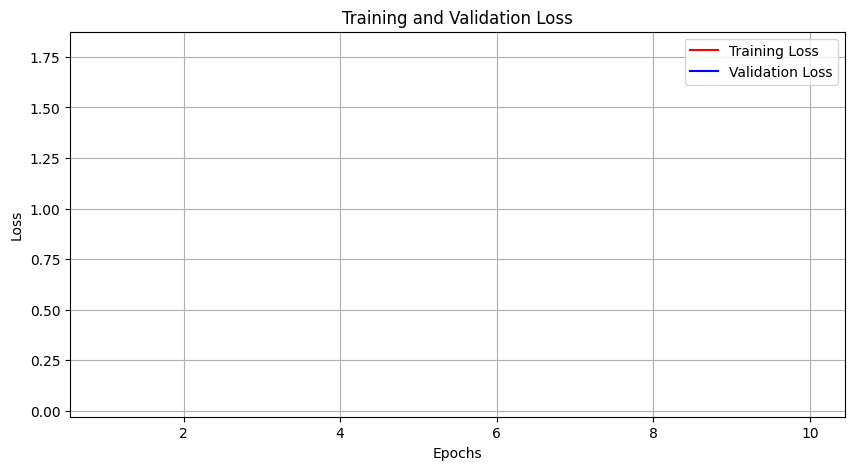

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored the losses during training in these lists
data=pd.DataFrame(trainer.state.log_history)
print(data.head(10))
data=data.iloc[:200]
train_losses=data['loss']
eval_losses=data['eval_loss']
epoch=data['epoch']
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epoch,train_losses, label='Training Loss', color='red')
plt.plot(epoch, eval_losses, label='Validation Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix
# Now you can make predictions
predictions = trainer.predict(small_test_dataset)

# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels =  small_test_dataset['labels']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

[[71  9  0  1  0  1  0]
 [ 3 63  3  0  3  0  0]
 [ 0  5 37  3  1  6  0]
 [ 0  1  1 51  1  0  0]
 [ 1  4  0  3 70  0  0]
 [ 0  0  1  1  2 39  1]
 [ 1  0  1  0  0  0 44]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        82
           1       0.77      0.88      0.82        72
           2       0.86      0.71      0.78        52
           3       0.86      0.94      0.90        54
           4       0.91      0.90      0.90        78
           5       0.85      0.89      0.87        44
           6       0.98      0.96      0.97        46

    accuracy                           0.88       428
   macro avg       0.88      0.88      0.88       428
weighted avg       0.88      0.88      0.88       428



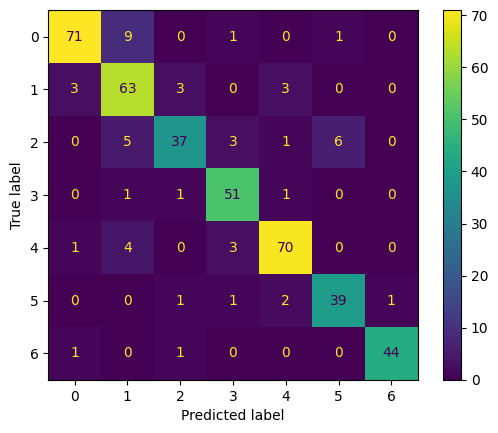

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#overall performance of the fine-tuned BERT model on Amharic new classification
trainer.evaluate(small_test_dataset)

{'eval_loss': 0.6008928418159485,
 'eval_precision': 0.8797563200695996,
 'eval_recall': 0.8761682242990654,
 'eval_f1': 0.8759868741835638,
 'eval_accuracy': 0.8761682242990654,
 'eval_runtime': 14.6936,
 'eval_samples_per_second': 29.128,
 'eval_steps_per_second': 3.675,
 'epoch': 10.0}

# New Section